# MDI341: TP Graphs

**Warning**: Ce notebook a été conçu sous Python 2 et NetworkX version 1.11. De légers problèmes de compatibilité peuvent être rencontrés sous Python 3 (ex : urllib) et NetworkX 2.x.

In [15]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile
import warnings


**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

On commence par créer et visualiser un graphe de type Erdős-Rényi avec n=200 noeuds et p=0.04. Vous aurez besoin des fonctions `nx.erdos_renyi_graph` et `nx.draw`.

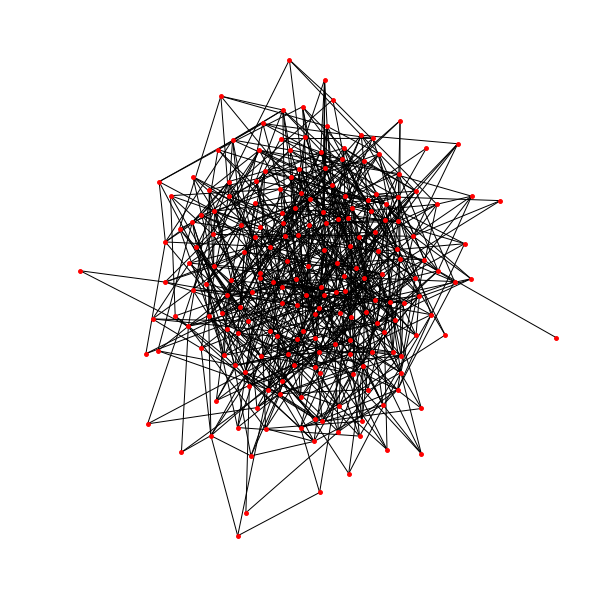

In [16]:
warnings.filterwarnings('ignore')
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)

#plot
plt.figure(figsize=(8,8))
pos=nx.spring_layout(G_erdos)
nx.draw(G_erdos,pos,width=1,node_size=15)
plt.show()


#### Question 2

Calculons des statistiques sur le nombre d'arêtes et la distribution des degrés.

In [17]:
degree_sequence_erdos = G_erdos.degree().values()
degree_sequence_erdos_array = np.array(list(degree_sequence_erdos),dtype=np.float32)
degree_sequence_erdos_array[0]

degree_moyen = np.mean(degree_sequence_erdos_array)
degree_median = np.median(degree_sequence_erdos_array)
degree_min = np.min(degree_sequence_erdos_array)
degree_max = np.max(degree_sequence_erdos_array)

print("degrée moyen : {} ; degrée median : {} ; degree min : {} ; degrée max : {}".format(degree_moyen,\
                                                                                            degree_median,\
                                                                                            degree_min,\
                                                                                            degree_max))

degrée moyen : 7.820000171661377 ; degrée median : 8.0 ; degree min : 1.0 ; degrée max : 14.0


In [18]:
print("Le degrée pour un graph erdos suivant une loi binomiale, en espérance le dégré moyen pour un graph erdos est n*p (parametres de la loi) = {}".format(n*p))

Le degrée pour un graph erdos suivant une loi binomiale, en espérance le dégré moyen pour un graph erdos est n*p (parametres de la loi) = 8.0


On remarque que le degrée moyen est proche de l'espérance théorique du degrée.

#### Question 3

On trace la distribution des degrés en échelle normale, puis en échelle log-log. La fonction `nx.degree_histogram` vous sera utile.

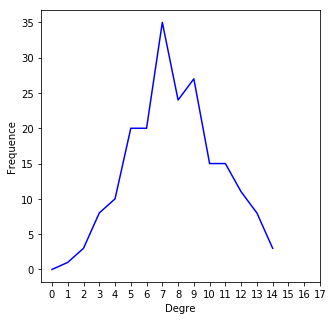

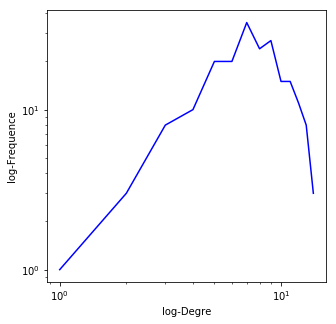

In [19]:
degree_freq = nx.degree_histogram(G_erdos)
y = degree_freq

plt.figure(figsize=(5, 5))
plt.plot(y, 'b-')
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.xticks(np.arange(0,18))

plt.figure(figsize=(5, 5))
plt.loglog(y, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")


Rappel théoreme central limite : Soit X1, X2, … une suite de variables aléatoires réelles définies sur le même espace de probabilité, indépendantes et identiquement distribuées suivant la même loi D. Supposons que l'espérance μ et l'écart-type σ de D existent et soient finis avec σ ≠ 0.
Considérons la somme

Sn = X1 + X2 + … + Xn.
Quand n est assez grand, la loi normale N(n*μ,n*σ^2) est une bonne approximation de la loi de Sn.

Pour un graph Erdos tous les degrés suivent une loi binomiale, on s'attend donc à observer pour un nombre de noeuds suffisament grand, une distribution centrée autour de la moyenne avec une "small tail", à l'image de la distribution d'une loi binomiale. (On n'est pas dans le cas ici du tcl puisqu'on étudie pas la somme ou la moyenne des degrés à chaque tirage).
Cela correspond à ce qu'on attend pour avoir une courbe plus lisse il faudrait plus de noeud.

En ce qui concerne le plot log frequence, on constate bien qu'on a pas ici une loi de puissance.

#### Question 4

On calcule maintenant le coefficient de clustering global (voir `nx.clustering`)

In [20]:
cluster_coeff_array = np.array(list(nx.clustering(G_erdos).values()))

print("coeff clustering global : {}".format(np.mean(cluster_coeff_array)))

coeff clustering global : 0.03492257742257742


Le coeff de clustering global est faible, plus le coeff de clustering est proche de 1 plus on est proche d'avoi un graph complet


L'espérance théorique du coeff clustering global dans le cas d'un graph Erdos vaut p, probabilité d'avoir un lien entre deux noeuds. La moyenne du coeff de clustring 0.038 est effectivement proche de p:0.04


#### Question 5

On affiche la longueur moyenne des plus courts chemins et le diamètre du graphe

In [21]:
print("diametre du graph : {} ; longueur moyenne des plus courts chemins : {}".format(nx.diameter(G_erdos),\
                                                                                     nx.average_shortest_path_length(G_erdos)))

diametre du graph : 5 ; longueur moyenne des plus courts chemins : 2.7930653266331658


On peut en effet parler d'effet petit monde ici : 
    - longueur moyenne du plus court chemin entre deux noeuds quelconque du graph est inférieure à 3;
    - le plus grande petite distance entre deux noeuds est de 5 -> quelque soit mon noeud de départ, je suis à moins de 5 edges de mon noeud d'arrivée.

### Barabási–Albert

#### Question 6

On crée et visualise maintenant un graphe de Barabási–Albert avec n=200 noeuds (on ajoute à chaque fois m=3 arêtes), puis on applique la même analyse que celle faite pour Erdős-Rényi

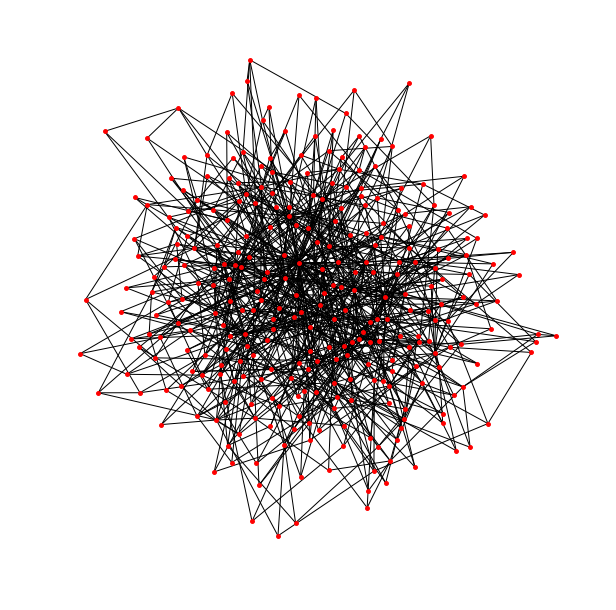

In [22]:
warnings.filterwarnings('ignore')

n = 300
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)

#plot
plt.figure(figsize=(8,8))
pos=nx.spring_layout(G_barabasi)
nx.draw(G_barabasi,pos,width=1,node_size=15)
plt.show()


Calculons des statistiques sur le nombre d'arêtes et la distribution des degrés.

In [23]:
degree_sequence_barbasi = G_barabasi.degree().values()
degree_sequence_barbasi_array = np.array(list(degree_sequence_erdos),dtype=np.float32)
degree_sequence_barbasi_array[0]

degree_moyen = np.mean(degree_sequence_barbasi_array)
degree_median = np.median(degree_sequence_barbasi_array)
degree_min = np.min(degree_sequence_barbasi_array)
degree_max = np.max(degree_sequence_barbasi_array)

print("degrée moyen : {} ; degrée median : {} ; degree min : {} ; degrée max : {}".format(degree_moyen,\
                                                                                            degree_median,\
                                                                                            degree_min,\
                                                                                            degree_max))

degrée moyen : 7.820000171661377 ; degrée median : 8.0 ; degree min : 1.0 ; degrée max : 14.0


En théorie dans le cadre d'un graph de barbasi, l'espérance théorique converge  si alpha>2, sinon elle diverge, aussi elle est indépendante de n. Alpha liée à la distribution des degrés des noeuds proportionnelle à k^-alpha

Pour obtenir le alpha précisément, il faudrait faire une regression sur la courbe de distribution des degrés...

On trace la distribution des degrés en échelle normale, puis en échelle log-log. La fonction nx.degree_histogram vous sera utile.

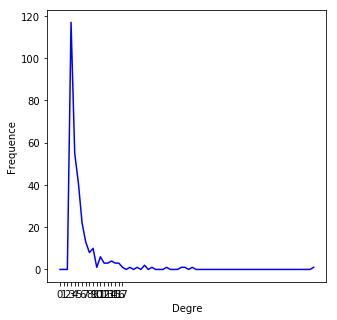

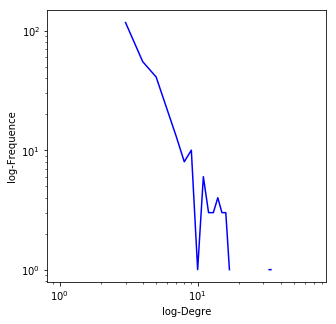

In [24]:
degree_freq = nx.degree_histogram(G_barabasi)
y = degree_freq

plt.figure(figsize=(5, 5))
plt.plot(y, 'b-')
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.xticks(np.arange(0,18))

plt.figure(figsize=(5, 5))
plt.loglog(y, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")


On retrouve les caractéristiques de distribution du degré d'un graph de barbasi :
 - la courbe de distribution possede une "heavy tail" nombre non négligeable de noeuds avec un fort degré, la grande majorité des noeuds possède un faible degré;
 - la courbe de distribution version log (log(frequence) = f (log(degre)), est presque linéaire, on retombe donc bien sur une loi de puissance, loi suivie par Pk proba pour un noeud d'avoir k degrés.

On calcule maintenant le coefficient de clustering global (voir nx.clustering)

In [25]:
dict_degre_cluster = dict()

cluster_coeff_array = np.array(list(nx.clustering(G_barabasi).values()))

#get for each degree, the corresponding clustering coeff in a dict
for degre in np.unique(degree_sequence_barbasi_array):
    idx = np.where(degree_sequence_barbasi_array==degre)
    dict_degre_cluster[degre] = np.mean(cluster_coeff_array[idx])

In [26]:
np.unique(degree_sequence_barbasi_array)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.], dtype=float32)

In [27]:
#get k^-1 
cluster_coeff_theory = np.power(np.unique(degree_sequence_barbasi_array),-1)
cluster_coeff_theory

array([1.        , 0.5       , 0.33333334, 0.25      , 0.2       ,
       0.16666667, 0.14285715, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333334, 0.07692308, 0.07142857], dtype=float32)

In [28]:
cluster_coeff_theory/np.array(list(dict_degre_cluster.values()))

array([         inf,          inf, 208.0000062 ,   1.42340714,
         1.85915496,   2.47765885,   1.25498513,   1.54274265,
         1.61992557,   1.74590329,   1.27036059,   1.64769785,
         0.93558478,   2.9464287 ])

Théoriquement le coeff de clustering des noeuds de degré k est proportionnel à k^-1. Pour le vérifier il faut calculer le coeff de clustering des noeuds selon différent degrés.

On affiche la longueur moyenne des plus courts chemins et le diamètre du graphe

In [29]:
print("diametre du graph : {} ; longueur moyenne des plus courts chemins : {}".format(nx.diameter(G_barabasi),\
                                                                                     nx.average_shortest_path_length(G_barabasi)))

diametre du graph : 5 ; longueur moyenne des plus courts chemins : 3.0300780379041248


effet petit monde également voir réponse graph erdos

## Graphe Karate Club

On va maintenant travailler sur un graphe réel de petite taille (n=34, m=78) qui représente les liens d'amitié entre les adhérents d'un club de karaté (le graphe est intégré à la librairie `networkx`)

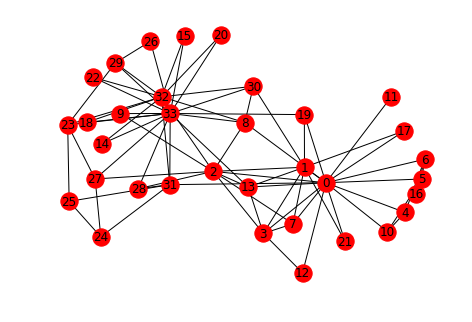

In [30]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

On va appliquer un clustering hiérarchique pour faire de la détection de communauté. On calcule d'abord la matrice des distances entre noeuds, où la distance entre 2 noeuds correspond à la longueur du plus court chemin. C'est sur la base de cette matrice de distances que l'on va computer le hierarchical clustering.

In [31]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=nx.all_pairs_shortest_path_length(G_karate)
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

On peut maintenant utiliser l'implémentation de clustering hiérarchique ascendant de `scikit-learn` avec le *lien moyen* comme mesure de dissimilarité entre clusters. On affiche tout d'abord le clustering à 4 clusters

In [32]:
from sklearn.cluster import AgglomerativeClustering

#on lui donne en distance la matrice des plus courts chemins
agg_clustering = AgglomerativeClustering(affinity='precomputed',linkage='complete')

# TODO QUESTION 7
labels_2 = agg_clustering.fit_predict(distances)

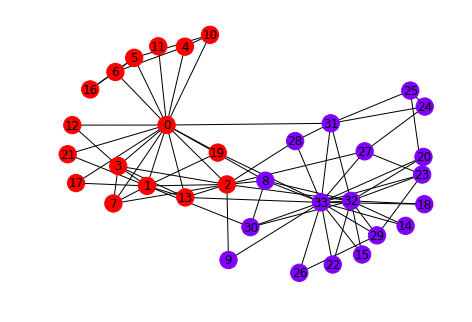

In [33]:
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos,node_color=labels_2)

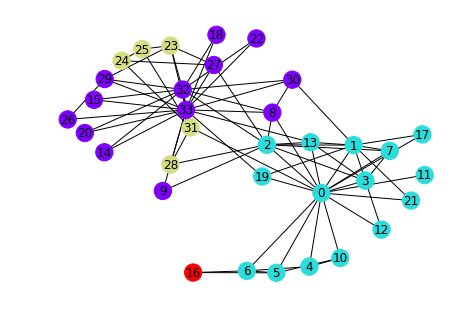

In [34]:
agg_clustering_4 = AgglomerativeClustering(affinity='precomputed',linkage='complete',n_clusters=4)
labels_4 = agg_clustering_4.fit_predict(distances)

#plot
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos,node_color=labels_4)

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

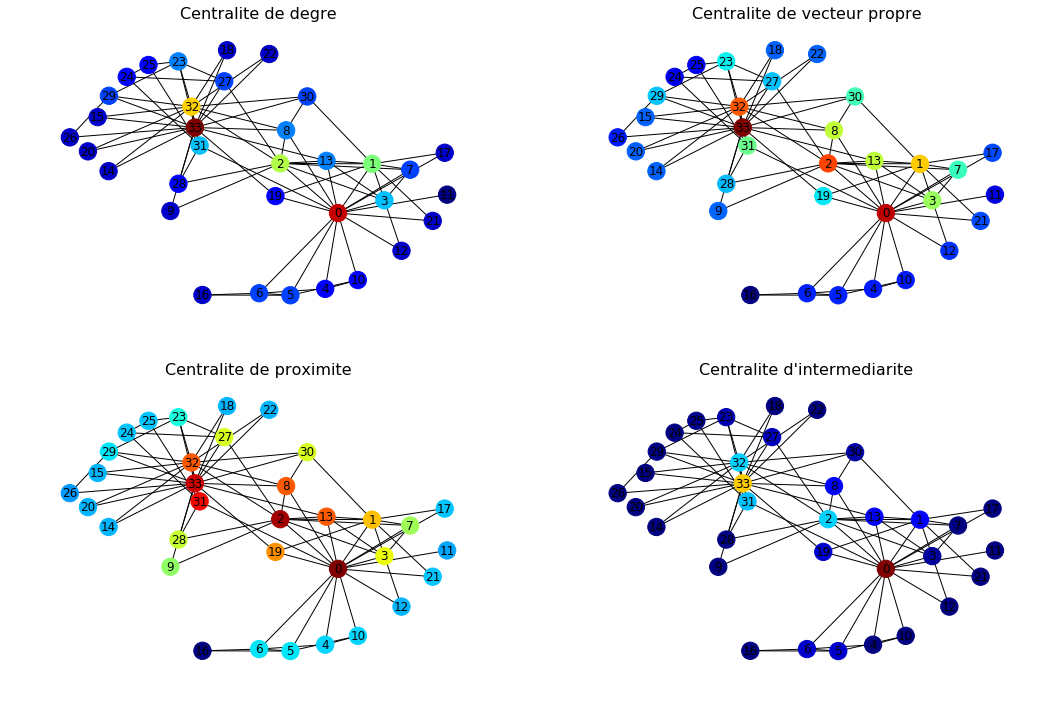

In [35]:
c_degree = np.array(list(nx.degree_centrality(G_karate).values()),dtype=np.float32)
c_eigenvector = np.array(list(nx.eigenvector_centrality(G_karate).values()),dtype=np.float32)
c_closeness = np.array(list(nx.closeness_centrality(G_karate).values()),dtype=np.float32)
c_betweenness = np.array(list(nx.betweenness_centrality(G_karate).values()),dtype=np.float32)

plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Centralite de degre', size=16)

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Centralite de vecteur propre', size=16)

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Centralite de proximite', size=16)

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Centralite d\'intermediarite', size=16)

Rappel :
 - Cenralité de degré <=> forte si degré du noeud élevé
 - Centralité EigenValues <=> forte si le noeud en question est connecté a des noeuds très connectés
 - Centralité de proximité <=> forte si distance moyenne du noeud aux autre noeuds petites
 - Centralité d'intermediarité <=> forte si le noeud en question est un lieu de passage pour relier 2 noeuds

On constate qu'en fonction de la défintion de la centralité choisie on obtient des centralités très différentes notamment pour les noeuds centraux / hubs.

Le 30 par exemple à un faible degré (low degree centrality), n'est pas souvent un noeud de passage (low intermediary centrality) mais est connecté directement à des noeuds importants (high eigen value centrality)

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

On va maintenant étudier un graphe de grande taille dont les noeuds sont des produits vendus par Amazon, et deux noeuds sont connectés si les deux produits sont fréquemment achetés ensemble (plus de détails [ici](https://snap.stanford.edu/data/com-Amazon.html))

In [136]:
#if os.path.exists('amazon.txt.gz') is False:
 #   resp = urllib.urlretrieve('https://snap.stanford.edu/data/bigdata/' +
  #                            'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt')

In [ ]:
pos = nx.spring_layout(G_amazon)
nx.draw(G_amazon, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

## Prédiction dans les graphes

Un *ego-network* est un sous-graphe d'un réseau social centré sur un utilisateur. Ici on va travailler avec un ego-network Facebook (téléchargeable [ici](https://snap.stanford.edu/data/egonets-Facebook.html)) qui représente les amis d'un utilisateur donné (sans ce dernier) et les liens d'amitié entre eux. Le jeu de données contient 10 ego-networks, on va travailler avec l'un d'entre eux seulement qui se prête bien à la visualisation.

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


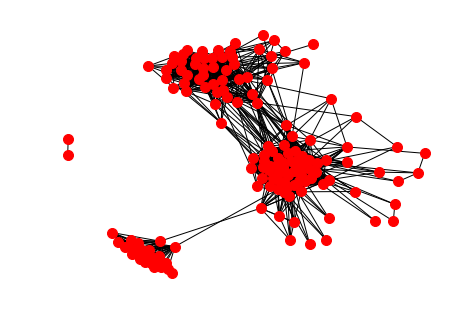

In [36]:
#if os.path.exists('facebook.tar.gz') is False:
 #   resp = urllib.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
  #                            'facebook.tar.gz')
   # tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=100, pos=pos)
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

On va maintenant essayer de prédire des liens dans le réseau. Pour cela, on commence par extraire une proportion des arêtes du graphe, dont on cherchera à prédire l'existence parmi toutes les arêtes non-existantes possibles. Le graphe d'apprentissage est le graphe original auquel on retire les arêtes sélectionnées.

In [37]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

#selection aleatoire des edges à retirer
proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))

#creation du graph train depourvu des 20% d'arrêtres aleatoirement selectionnees
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

On retire 20% des arrêtes dans l'ensemble du graphe de manière aléatoire. Puis on compute les scores jaccards, Adamic-Adar, Attachment-preferentiel entre les noeuds non-connectés (en oubliant ces arrêtes retirées).

Malgré ces arrêtes retirées on est censé trouver un coefficient "réaliste" au niveau des paires anciennement connectées, et ainsi retrouver les arrêtes retirées via le score. -> Celle ci 

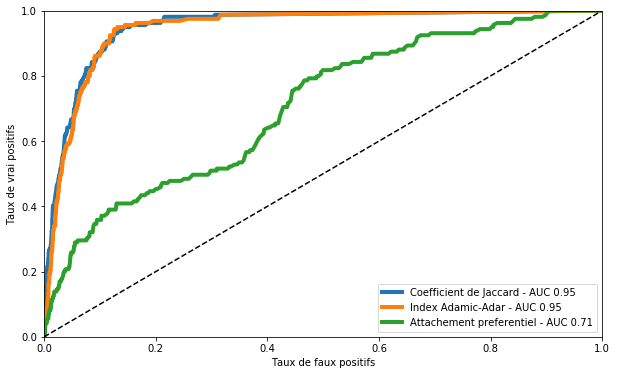

In [38]:
from sklearn.metrics import roc_curve, auc

# jaccard implementation (proportion de voisin en commun entre 2 noeuds)
#u & v sont une pair de noeud, s le coefficient de jaccard associé à la paire
#Attention ne predit que sur les connections de pairs non établies !
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))


# label 1 si dans edge_subset (arc/connection retirée), 0 sinon => elle n'existe pas
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard]) 

#Adamic (lié au nombre de voisins "atypiques")
pred_adamic = list(nx.adamic_adar_index(G_fb_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

#preferential attachment
pred_pref = list(nx.preferential_attachment(G_fb_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

fpr_jaccard, tpr_jaccard, thresholds = roc_curve(label_jaccard,score_jaccard)
auc_jaccard = auc(fpr_jaccard, tpr_jaccard)

fpr_adamic, tpr_adamic, thresholds = roc_curve(label_adamic,score_adamic)
auc_adamic = auc(fpr_adamic, tpr_adamic)

fpr_pref, tpr_pref, thresholds = roc_curve(label_pref,score_pref)
auc_pref = auc(fpr_pref, tpr_pref)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

On recherche parmi les connections innexistantes (9820), lesquels correspondent à des arrêtes retirés (338), celles-ci auront un plus grand ou plus petit score (selon le choix du scoring) que les autres connections car elles disposent de plus de voisins communs ou atypiques.

On se base sur la courbe roc pour vérifier le bon ordonnancement des scores en fonctions des labels (1: connection exitante retirée, 0: connection innexistante). 
En fonction de la courbe roc obtenu on pourra se fier à tel ou tel scoring pour prédire de nouveaux liens !

In [39]:
len(edge_subset)

338

In [40]:
len(label_jaccard)

9820

Ici les meilleurs scores à prendre son coefficient de jaccard ou index Adamic-Adar, tout deux présentant un faible taux d'erreurs dans l'odre des scores attribué sur des arrêtes effectivement à relier et des arrêtes innexistantes (0.94)

#### Question 11

On va maintenant faire de la classification semi-supervisée des noeuds. Pour cela on va utiliser les attributs qui sont fournis avec l'ego-network. Ces attributs représentent des caractéristiques (anonymisées) des utilisateurs du réseau. Dans la suite nous allons utiliser l'attribut `43` qui vaut `+1` (rouge) si la personne a étudié dans une école donnée, et `-1` (bleu) sinon.

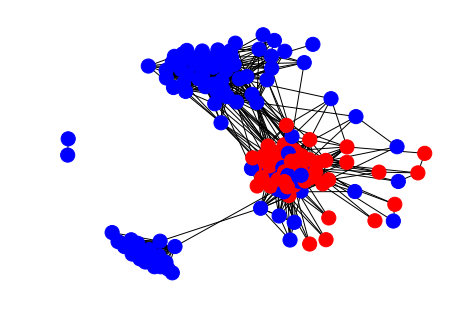

In [41]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)

On voit que cet attribut est relativement lisse sur le graphe, il se prête donc bien à la classification par propagation de label (ce n'est pas le cas de tous les attributs!). On va donc sélectionner aléatoirement une petite proportion de noeuds pour lesquels nous aurons accès aux labels. Notre tâche sera d'utiliser ces noeuds étiquetés ainsi que la structure du graphe pour prédire le label des autres noeuds. On regarde d'abord les noeuds étiquetés.

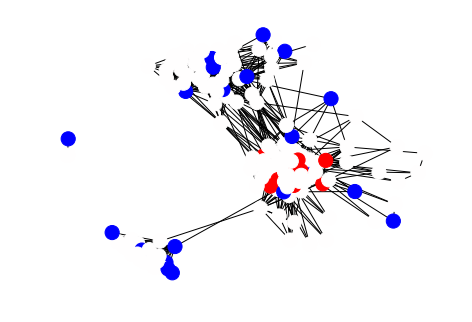

In [42]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
#on selection aléatoirement 20% des noeuds
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

#on génère le ground truth de label dim n, seul les labels des noeuds selectionnés sont renseignés -1 ou 1
#pour le reste on laisse 0
known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

#on plot le graph avec en ground truth nos labels pour le semi supervisé
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)

On va maintenant appliquer la propagation de label et voir les résultats

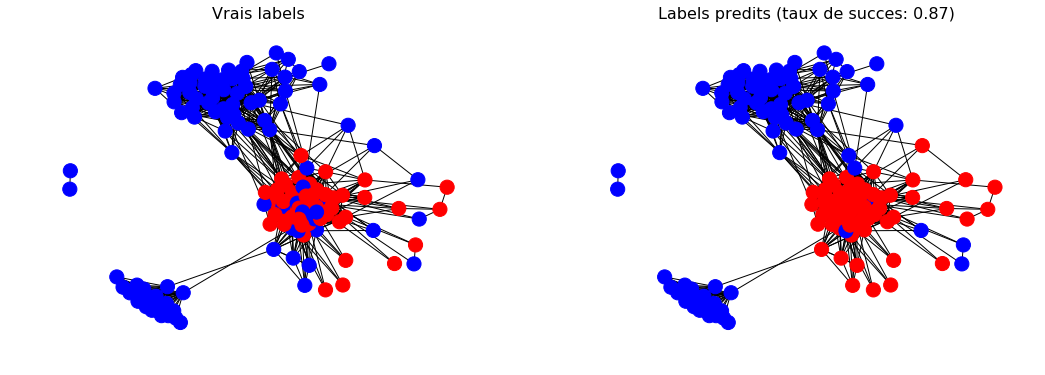

In [46]:
alpha = 0.7

#on calcul le laplacien associé au graph
L_sym = nx.normalized_laplacian_matrix(G_fb,nodelist=range(n))

# on calcule la matrice de labels initiale : on a 2 labels donc Y est de dim n X 2
#si pas renseigné des 0 pour les 2, si label -1 on met 1 dans la premiere colonne, si label 1 on met 1 dans la 2nde
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# propagation de labels à faire ici
#step 0
F_pred = np.asarray(np.dot(np.linalg.inv((1-alpha)*np.eye(L_sym.shape[0]) + L_sym ),Y))
                   
# labels prédits à mettre dans une variable F_pred pour affichage ci-dessous
#1 (colonne 1) ou -1 (colonne 0)
#F_pred = 2 * np.argmax(F_pred, axis=1) - 1
F_pred = np.argmax(F_pred,axis=1)
F_pred[F_pred==0] = -1
# taux de succes a mettre dans une variable pred pour affichage ci-dessous
pred = np.mean(F_pred==labels)

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred, size=16)